<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


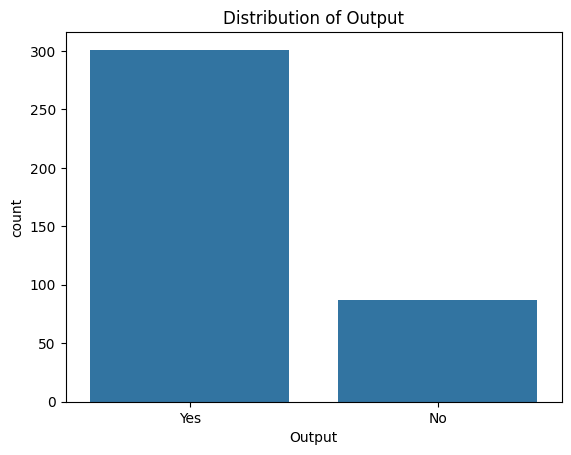

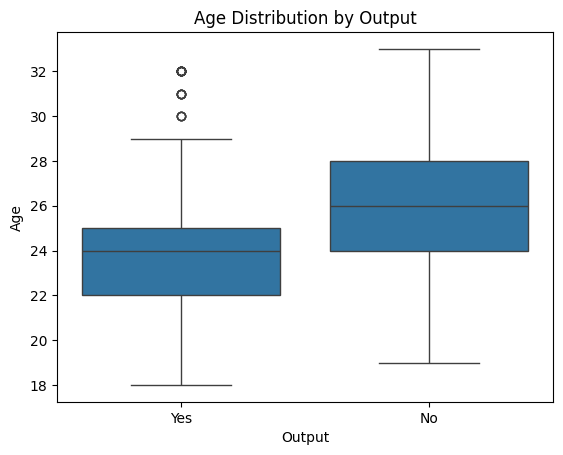

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/onlinefoods.csv")
df
print(df.info())
print(df.describe())
print(df.isnull().sum())
sns.countplot(x='Output', data=df)
plt.title('Distribution of Output')
plt.show()

sns.boxplot(x='Output', y='Age', data=df)
plt.title('Age Distribution by Output')
plt.show()

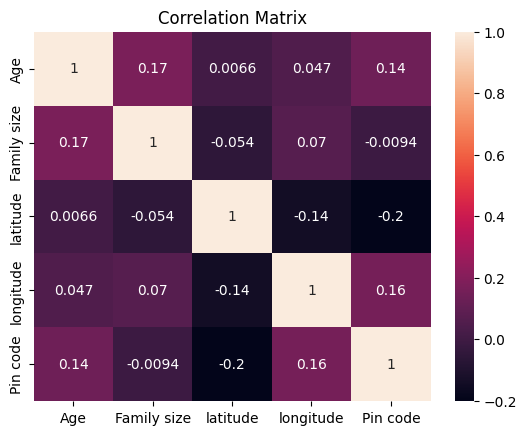

In [2]:
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

In [4]:
# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [5]:
# Splitting the dataset into training and testing sets
X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Applying preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.87
              precision    recall  f1-score   support

          No       0.60      0.50      0.55        12
         Yes       0.91      0.94      0.93        66

    accuracy                           0.87        78
   macro avg       0.76      0.72      0.74        78
weighted avg       0.86      0.87      0.87        78

Decision Tree Accuracy: 0.87
              precision    recall  f1-score   support

          No       0.56      0.75      0.64        12
         Yes       0.95      0.89      0.92        66

    accuracy                           0.87        78
   macro avg       0.76      0.82      0.78        78
weighted avg       0.89      0.87      0.88        78

Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

          No       0.70      0.58      0.64        12
         Yes       0.93      0.95      0.94        66

    accuracy                           0.90        78
   macro avg       0.81      0.77  

['preprocessor.pkl']

ModuleNotFoundError: No module named 'streamlit'